Found 3000 images belonging to 6 classes.


2025-06-01 16:11:03.300202: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-01 16:11:03.300231: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-06-01 16:11:03.300234: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-06-01 16:11:03.300247: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-01 16:11:03.300261: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/ai-env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__


 Test Accuracy Summary:
               Model_Name  Test_Accuracy
0              Base Model       0.673333
1          Advanced Model       0.794667
2             Tuned Model       0.808000
3  Transfer Learning (FT)       0.903667
4       Data Augmentation       0.846667


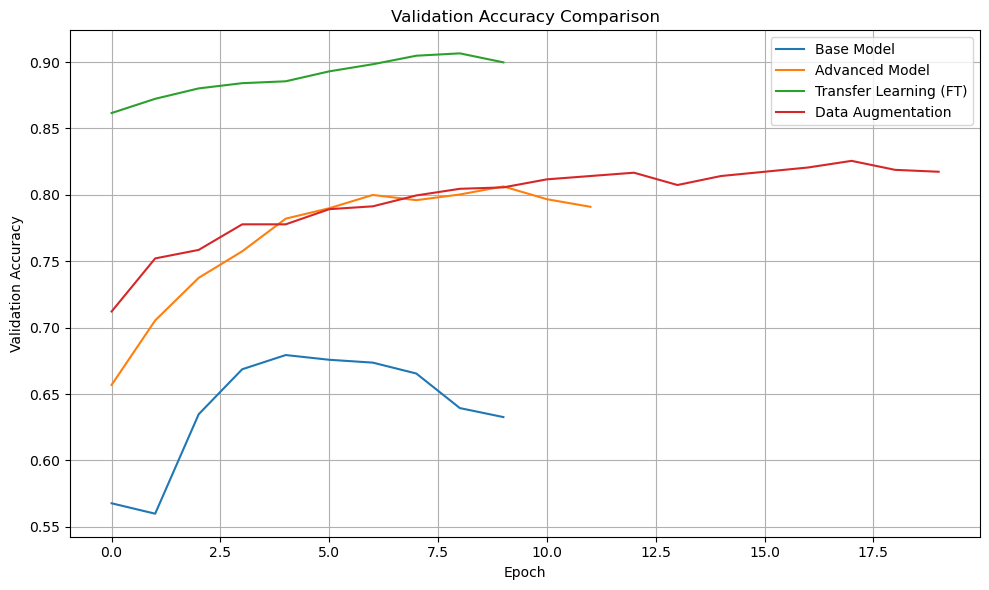

188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step

Classification Report:
              precision    recall  f1-score   support

   buildings       0.85      0.88      0.86       437
      forest       0.97      0.98      0.97       474
     glacier       0.74      0.86      0.79       553
    mountain       0.81      0.73      0.77       525
         sea       0.86      0.79      0.83       510
      street       0.89      0.85      0.87       501

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



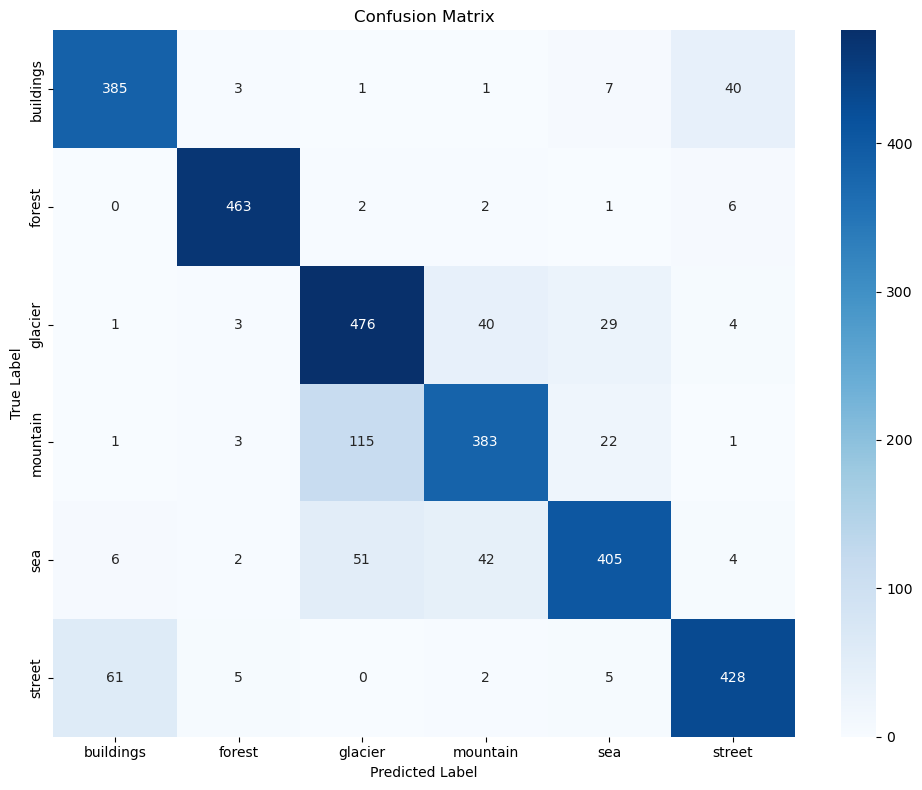

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


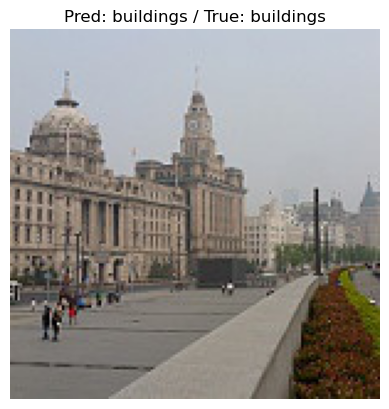

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
models_dir = Path("/Users/eric/Documents/Masters Degree/M9.-Deep learning aplicada, NLP y visión artificial/7.-Evaluacion final M9/Caso Practico 1/models/")
test_dir = Path("/Users/eric/Documents/Masters Degree/M9.-Deep learning aplicada, NLP y visión artificial/7.-Evaluacion final M9/Caso Practico 1/data/seg_test/")

# Model Files
model_files = {
    "Base Model": "base_model.h5",
    "Advanced Model": "advanced_model.h5",
    "Tuned Model": "best_model_hptuning.h5",
    "Transfer Learning (FT)": "tl_model_finetuned.h5",
    "Data Augmentation": "vgg16_aug_model.h5"
}

# Test Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

class_labels = list(test_generator.class_indices.keys())

# Evaluate the models
results = []

for name, file in model_files.items():
    model = load_model(models_dir / file)
    loss, acc = model.evaluate(test_generator, verbose=0)
    results.append({"Model_Name": name, "Test_Accuracy": acc})

# Result table
results_df = pd.DataFrame(results)
print("\n Test Accuracy Summary:")
print(results_df)

# Validation Accuracy Comparison
plt.figure(figsize=(10, 6))
for name, file in model_files.items():
    json_path = models_dir / file.replace(".h5", "_history.json")
    if json_path.exists():
        with open(json_path, 'r') as f:
            history = json.load(f)
        plt.plot(history['val_accuracy'], label=name)

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Analysis of best model (Data Augmentation)
best_model_path = models_dir / "vgg16_aug_model.h5"
best_model = load_model(best_model_path)

Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Clasification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

# Prediction Examples (imshow)
for i in range(5):
    image, label = test_generator[i][0][0], test_generator[i][1][0]
    pred = best_model.predict(np.expand_dims(image, axis=0))
    pred_label = np.argmax(pred)
    true_label = np.argmax(label)

    plt.imshow(image)
    plt.title(f"Pred: {class_labels[pred_label]} / True: {class_labels[true_label]}")
    plt.axis('off')
    plt.show()
